# CSCE 554 HW 4
# Marvin Newlin
# 13 Aug 19

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import pandas
import random

import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline
from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
import seaborn
import probscale

## 6.2

### Answer
In a $2^k$ factorial design there are $2^k(n-1)$ error degrees of freedom. Thus, for a $2^3$ factorial design with $n=2$ replicates, there are $8(2-1) = 8$ error degrees of freedom. Thus, the answer is $\textbf{e}$.

## 6.5, a, b, and d

### a

 	Effect Estimate	Sum of Squares
A	     0.333	     0.667
B	    11.333	   770.667
C	     6.833	   280.167
AB	    -1.667	    16.667
AC	    -8.833	    -4.417
BC	    -2.833	    -1.417
ABC	    -2.167	    -1.083


C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:44: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(z) * numpy.sqrt(numpy.sqrt(_b**2 - _c) - _b)
C:\Users\Marvin\Anaconda3\lib\site-packages\probscale\probscale.py:32: RuntimeWarning: invalid value encountered in sign
  return numpy.sign(x) * numpy.sqrt(1.0 - numpy.exp(guts))


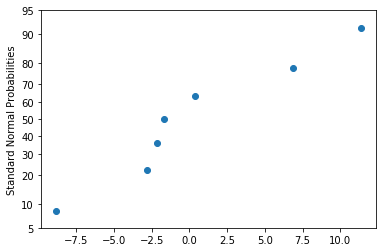

,Sum of Squares,Degrees of Freedom,Mean Square,F0,F Threshold,p-value
Cutting Speed (A),0.666667,1.0,0.666667,0.0103151,4.494,0.920365
Tool Geometry (B),770.666667,1.0,770.667,11.9242,4.494,0.00327174
Cutting Angle (C),280.166667,1.0,280.167,4.33492,4.494,0.0537498
AB,16.666667,1.0,16.6667,0.257877,4.494,0.618511
AC,-4.416667,1.0,-4.41667,-0.0683375,4.494,1
BC,-1.416667,1.0,-1.41667,-0.0219196,4.494,1
ABC,-1.083333,1.0,-1.08333,-0.016762,4.494,1
Error,1034.083333,16.0,64.6302,,,
Total,2095.333333,21.0,,,,


In [18]:
ones = np.array([22,31,25])
a = np.array([32,43,29])
b = np.array([35,34,50])
ab = np.array([55,47,46])
c = np.array([44,45,38])
ac = np.array([40,37,36])
bc = np.array([60,50,54])
abc = np.array([39,41,47])

n = 3
k = 3
alpha = 0.05

total = np.array([ones, a, b, c, ab, ac, bc, abc])
total_mean = np.mean(total)

# Contrasts
contrast_A =  np.sum(a - ones + ab - b + ac - c + abc - bc)
contrast_B =  np.sum(b - ones - a + ab - ac - c + bc + abc)
contrast_C =  np.sum(c + ac + bc + abc - ones - a - b -ab)
contrast_AB = np.sum(ab - a - b + ones + abc - bc - ac + c)
contrast_AC = np.sum(ones - a + b - ab - c + ac - bc + abc)
contrast_BC = np.sum(ones + a - b - ab - c - ac + bc + abc)
contrast_ABC= np.sum(abc - bc - ac + c - ab + b + a - ones)

# Sum of Squares
SSA = (contrast_A**2)/(n*np.power(2,k))
SSB = (contrast_B**2)/(n*np.power(2,k))
SSAB = (contrast_AB**2)/(n*np.power(2,k))
SSC = (contrast_C**2)/(n*np.power(2,k))
SSAC = (contrast_AC)/(n*np.power(2,k))
SSBC = (contrast_BC)/(n*np.power(2,k))
SSABC = (contrast_ABC)/(n*np.power(2,k))
SST = np.sum(np.square(total - total_mean))
SSE = SST - SSA - SSB - SSAB - SSC - SSAC - SSBC - SSABC
sum_squares = np.array([SSA, SSB, SSC, SSAB, SSAC, SSBC, SSABC, SSE, SST])

effect_A = contrast_A/(4*n)
effect_B = contrast_B/(4*n)
effect_C = contrast_C/(4*n)
effect_AB = contrast_AB/(4*n)
effect_AC = contrast_AC/(4*n)
effect_BC = contrast_BC/(4*n)
effect_ABC = contrast_ABC/(4*n)
effects = np.array([effect_A, effect_B, effect_C, effect_AB, effect_AC, effect_BC, effect_ABC])

effect_names = ['A', 'B', 'C', 'AB', 'AC', 'BC', 'ABC']
print(" \t{:10s}\t{:10s}".format("Effect Estimate", "Sum of Squares"))
for x in range(7):
    print("{}\t{:-10.3f}\t{:-10.3f}".format(effect_names[x], effects[x], sum_squares[x]))

# Normplot of effects   


probscale.probplot(effects,  plottype='prob',probax='y',
                         problabel='Standard Normal Probabilities', bestfit=False)

plt.show()

# Degrees of Freedom
DF_A = 1
DF_B = 1
DF_AB = 1
DF_C = 1 
DF_AC = 1
DF_BC = 1
DF_ABC = 1
DF_T = n*(np.power(2,k)-1)
DF_E = np.power(2,k)*(n-1)
DF = np.array([DF_A, DF_B, DF_C, DF_AB, DF_AC, DF_BC, DF_ABC, DF_E, DF_T])

# Mean Squares
MSA = SSA/DF_A
MSB = SSB/DF_B
MSAB = SSAB/DF_AB
MSC = SSC/DF_C
MSAC = SSAC/DF_AC
MSBC = SSBC/DF_BC
MSABC = SSABC/DF_ABC
MSE = SSE/DF_E
mean_squares = np.array([MSA, MSB, MSC, MSAB, MSAC, MSBC, MSABC, MSE,0])

# F0 vals
F0_A = MSA/MSE
F0_B = MSB/MSE
F0_AB = MSAB/MSE
F0_C = MSC/MSE
F0_AC = MSAC/MSE
F0_BC = MSBC/MSE
F0_ABC = MSABC/MSE
f_vals = np.array([F0_A, F0_B, F0_C, F0_AB, F0_AC, F0_BC, F0_ABC, 0, 0])

# F threshold vals
f_crit_a = stats.f.ppf(1-alpha,DF_A,DF_E)
f_crit_b = stats.f.ppf(1-alpha,DF_B,DF_E)
f_crit_ab = stats.f.ppf(1-alpha,DF_AB,DF_E)
f_crit_c = stats.f.ppf(1-alpha,DF_C,DF_E)
f_crit_ac = stats.f.ppf(1-alpha,DF_AC,DF_E)
f_crit_bc = stats.f.ppf(1-alpha,DF_BC,DF_E)
f_crit_abc = stats.f.ppf(1-alpha,DF_ABC,DF_E)
f_crits = np.array([f_crit_a, f_crit_b, f_crit_c, f_crit_ab,  f_crit_ac, f_crit_bc, f_crit_abc, 0, 0])

# P values
p_val_A = 1 - stats.f.cdf(F0_A, DF_A,DF_E)
p_val_B = 1 - stats.f.cdf(F0_B, DF_B,DF_E)
p_val_AB = 1 - stats.f.cdf(F0_AB, DF_AB,DF_E)
p_val_C = 1 - stats.f.cdf(F0_C, DF_C,DF_E)
p_val_AC = 1 - stats.f.cdf(F0_AC, DF_AC,DF_E)
p_val_BC = 1 - stats.f.cdf(F0_BC, DF_BC,DF_E)
p_val_ABC = 1 - stats.f.cdf(F0_ABC, DF_ABC,DF_E)
pvals = np.array([p_val_A, p_val_B, p_val_C, p_val_AB, p_val_AC, p_val_BC, p_val_ABC, 0,0])

vals_data = np.array([sum_squares, DF, mean_squares, f_vals, f_crits, pvals])
vals_df = pd.DataFrame(data=vals_data.T, index=['Cutting Speed (A)', 'Tool Geometry (B)', 'Cutting Angle (C)', 'AB', 'AC', 'BC', 'ABC', 'Error', 'Total'], 
                       columns=['Sum of Squares', 'Degrees of Freedom', 'Mean Square', 'F0', 'F Threshold', 'p-value'])
vals_df = vals_df.replace(to_replace=0,value='')
display(vals_df)

### Answer
Examining the results of the ANOVA, we see that the Tool Geometryis the only significant effects for $\alpha = 0.05$. Neither cutting speed nor any of the interaction effects have a statistically significant impact. 

### c 

## 7.1

## 6.11, a, b, e, and f

## 7.5

## 7.21

## 8.3

## 8.10